# HW02
Deep Learning, GIST RT5101-01, 2024, Spring, (Tue/Thurs 2:30~3:45)
***

### Problem1. Fully Connected Layer vs Convolution Neural Network
- Build your custom CNN model
- Check the result CNN has better result than FCN
- The test accuracy must bigger than 60%

----

### Problem2. Train Dogs and Cats data via CNN
- Understand the process of training the CNN model with custom dataloader.   
(Download URL: https://www.kaggle.com/c/dogs-vs-cats)
- Check the result
- The test accuracy must bigger than 60%

***
### You can add additional code for checking your image and model.
### You must summit ``.ipynb`` file. Do not summit ``.py`` file.
---

### How to submit your homework
Submit your jupyter notebook file with the filename of  *HW02_studentnumber.ipynb*  on GEL

Ex) HW02_20222015.ipynb  

### Submission deadline
2024.06.16, Sunday 23:59 (PM)

### Plagiarism
We encourage you to discuss this homework with your friends or TA, but you should write your own code.




***
***

## Problem 1. (total 10 pt.)
- **Fully Connected Layer vs Convolution Neural Network**
- We will use cifar10 dataset.
- You have to compare with HW1 result and check CNN model has better result.
- The test accuracy of CNN model must bigger than 60%.   
- Reference : https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

### Problem 1-1. (2 pt.)
- **Step 1**. Import package.  
- **Step 2**. Define device and configure hyperparameters.  
- **Step 3**. Download then load Cifar10 dataset to dataloader. You have to adjust transform.   

In [1]:
''' Step 1 '''
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# for reproducibility
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

lr = 1e-4
num_classes = 10
batch_size = 32
epochs = 20

In [3]:
def dataset(is_train):

    transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5,0.5, 0.5))])

    dataset = torchvision.datasets.CIFAR10(root='./data',train=is_train,download=True,transform=transform)


    return dataset

train_dataset = dataset(is_train=True)
val_dataset = dataset(is_train=False)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, 
                                         shuffle=False)

100%|██████████| 170498071/170498071 [07:44<00:00, 367247.43it/s]


Extracting ./data\cifar-10-python.tar.gz to ./data
Files already downloaded and verified


### Problem 1-2. (5 pt.)
- **Step 1**. Build your CNN model.  
- **Step 2**. Configure optimizer and objective function.  

In [4]:
''' Step 1 '''
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1) 
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1) 
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(128 * 4 * 4, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x))) #3*32*32 -> 32*32*32 -> 32*16*16
        x = self.pool(F.relu(self.conv2(x))) #32*16*16 -> 64*16*16 -> 64*8*8
        x = self.pool(F.relu(self.conv3(x))) #64*8*8 -> 128*8*8-> 128*4*4
        x = x.view(-1, 128 * 4 * 4)
        x = F.relu(self.fc1(x)) #fully conneted layer
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [5]:
''' Step 2 '''
model = CNN()
model.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr)
criterion = nn.CrossEntropyLoss().to(device)

### Problem 1-3. (3 pt.)
- **Step 1**. The method for model training
- **Step 2**. The method for testing model
- **Step 3**. Train the model and check the test results
- **Step 4**. Check the output after training

In [6]:
''' Step 1 '''
def train():
    for epoch in range (epochs):
        model.train()
        running_loss=0.0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs.to(device))
            loss = criterion(outputs, labels.to(device))
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader)}")

In [7]:
''' Step 2 '''
def test():
    model.eval()
    with torch.no_grad():
        total = 0.0
        correct = 0.0
        for inputs, labels in val_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f"Test Accuracy: {(correct/total)*100:.2f}%")

In [8]:
''' Step 3 '''
train()


Epoch 1/20, Loss: 1.6649177978607759
Epoch 2/20, Loss: 1.3492298768028874
Epoch 3/20, Loss: 1.203518074861491
Epoch 4/20, Loss: 1.0767964644837822
Epoch 5/20, Loss: 0.9865622573835454
Epoch 6/20, Loss: 0.9063960117021587
Epoch 7/20, Loss: 0.8405444551299798
Epoch 8/20, Loss: 0.7825292828883106
Epoch 9/20, Loss: 0.7283496082744305
Epoch 10/20, Loss: 0.6759020006015982
Epoch 11/20, Loss: 0.627928626829054
Epoch 12/20, Loss: 0.5794981039073783
Epoch 13/20, Loss: 0.5307542046940792
Epoch 14/20, Loss: 0.4853514309159777
Epoch 15/20, Loss: 0.4378185375657359
Epoch 16/20, Loss: 0.3967183022375528
Epoch 17/20, Loss: 0.35307734803328206
Epoch 18/20, Loss: 0.3088200703473024
Epoch 19/20, Loss: 0.26942034989061525
Epoch 20/20, Loss: 0.2288574513562753


In [9]:
''' Step 4 '''
test()

Test Accuracy: 74.44%


---
---

## Problem 2. (Total 10 pt.)
- **Train Dogs and Cats data via CNN**
- **You must set the class that Dogs are 0 and Cats are 1.**
- Understand the process of training the CNN model with custom dataloader.
- Download the dataset from below.   
https://www.kaggle.com/c/dogs-vs-cats
- The test accuracy of CNN model must bigger than 60%.   

### Problem 2-1. (4 pt.)
- **Step 1**. Import package.  
- **Step 2**. Define device and configure hyperparameters.  
- **Step 3**. Load **Dogs and Cats** dataset to dataloader. You have to adjust transform.  
**You can label dataset via images name at train folder.**

In [2]:
''' Step 1 '''
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
import os
from torch.utils.data import Dataset, DataLoader
from PIL import Image
from sklearn.model_selection import train_test_split

In [3]:
''' Step 2 '''
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# for reproducibility
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

lr = 1e-4
num_classes = 2
batch_size = 32
epochs = 20

In [56]:
''' Step 3 '''
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

class CustomImageDataset(Dataset):
    def __init__(self, img_dir, img_labels, transform=None):
        self.img_dir = img_dir
        self.transform = transform
        self.img_labels = img_labels
        
    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_name = os.path.join(self.img_dir, self.img_labels[idx])
        image = Image.open(img_name).convert("RGB")
        
        if self.transform:
            image = self.transform(image)
        
        
        label = 0 if 'cat' in img_name else 1
        
        return image, label

# Paths to train and test directories
train_dir = './data/train'
test_dir = './data/test1'

all_img_labels = [img for img in os.listdir(train_dir) if img.endswith(('.png', '.jpg', '.jpeg'))]

#sklearn의 split 함수로 valid set을 만들어준다.
train_labels, val_labels = train_test_split(all_img_labels, test_size=0.2, random_state=42)

# Create datasets
train_dataset = CustomImageDataset(img_dir=train_dir, img_labels=train_labels, transform=transform)
val_dataset = CustomImageDataset(img_dir=train_dir, img_labels=val_labels, transform=transform)
test_dataset = CustomImageDataset(img_dir=test_dir, img_labels=os.listdir(test_dir), transform=transform)

# Create DataLoaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

### Problem 2-2. (3 pt.)
- **Step 1**. Build your CNN model.  
(It doesn't matter if you use same model at problem 1.)
- **Step 2**. Configure optimizer and objective function.

In [57]:
''' Step 1 '''
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)
        self.conv4 = nn.Conv2d(128, 256, 3, padding=1)
        self.conv5 = nn.Conv2d(256, 512, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(512 * 4 * 4, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, 256)
        self.fc4 = nn.Linear(256, num_classes)
        self.dropout = nn.Dropout(0.5)

        self._initialize_weights()

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x))) #3*128*128 -> 32*128*128 -> 32*64*64
        x = self.pool(F.relu(self.conv2(x))) #32*64*64 -> 64*64*64 -> 64*32*32
        x = self.pool(F.relu(self.conv3(x))) #64*32*32 -> 128*32*32 -> 128*16*16
        x = self.pool(F.relu(self.conv4(x))) #128*16*16 -> 256*16*16 -> 256*8*8
        x = self.pool(F.relu(self.conv5(x))) #256*8*8 -> 512*8*8 -> 512*4*4
        x = x.view(-1, 512 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x
    
    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.Linear):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
                nn.init.constant_(m.bias, 0)

In [58]:
''' Step 2 '''
model = CNN()
model.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr)
criterion = nn.CrossEntropyLoss().to(device)

### Problem 2-3. (3 pt.)
- **Step 1**. The method for model training
- **Step 2**. The method for validation model
- **Step 3**. Train the model and check the validation results
- **Step 4**. Check the test result by **ten** samples with image

In [59]:
def train():
    for epoch in range (epochs):
        model.train()
        running_loss=0.0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs.to(device))
            loss = criterion(outputs, labels.to(device))
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader)}")

In [60]:
''' Step 2 '''
def test():
    model.eval()
    with torch.no_grad():
        total = 0.0
        correct = 0.0
        for inputs, labels in val_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f"Validation Accuracy: {(correct/total)*100:.2f}%")

In [61]:
''' Step 3 '''
train()

test()

Epoch 1/20, Loss: 0.9430516386032104


KeyboardInterrupt: 

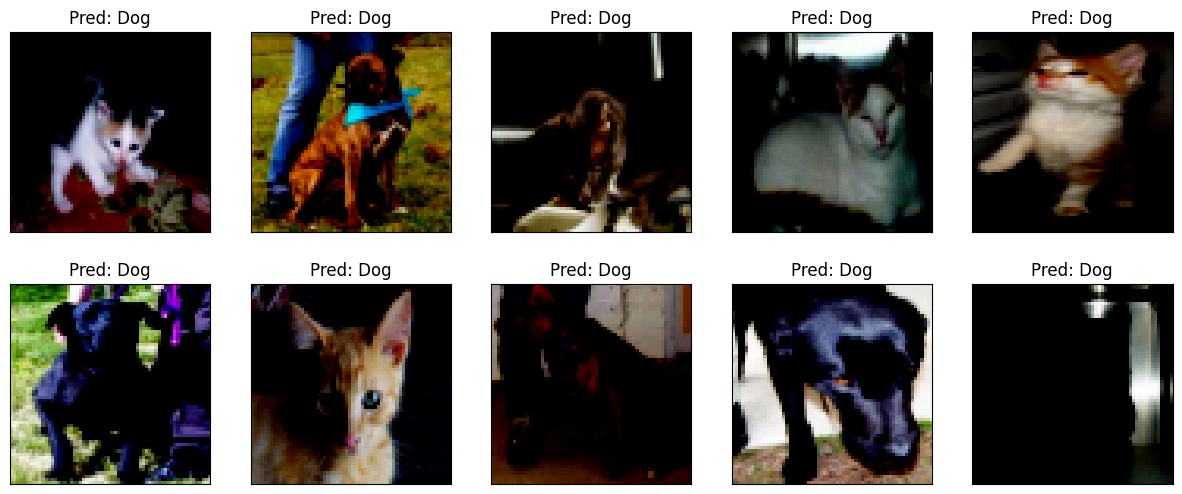

In [ ]:
''' Step 4 '''
CnD_test_path = test_dir

model.eval()
test_images, test_labels = next(iter(test_loader))
test_images, test_labels = test_images.to(device), test_labels.to(device)
outputs = model(test_images)
_, predicted = torch.max(outputs.data, 1)

# Display the images and predictions
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(15, 6))
for i in range(10):
    ax = fig.add_subplot(2, 5, i+1, xticks=[], yticks=[])
    img = test_images[i].cpu().numpy().transpose((1, 2, 0))
    img = np.clip(img, 0, 1)
    ax.imshow(img)
    ax.set_title(f'Pred: {"Dog" if predicted[i] == 0 else "Cat"}')

plt.show()